In [3]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
import pandas as pd
import cv2 as cv

In [17]:
import tensorflow
print(tensorflow.__version__)
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Input, Flatten , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

from keras.callbacks import TensorBoard
import time
from datetime import datetime


2.9.1


In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [8]:
# degerleri 0-1 sikistirildi
x_train = x_train.astype('float32')/255
x_test= x_test.astype('float32')/255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [9]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [10]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
x_train.shape

(60000, 28, 28, 1, 1)

In [18]:
time = time.strftime("%Y_%m_%d_%H_%M_%S")

batch_size = 128
num_classes = 10
epochs = 20

In [19]:
earlyStoping = EarlyStopping(monitor='loss', mode= 'min', verbose=1, patience= 5)

In [20]:
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()),
model.add(Dropout(0.5))
model.add(Dense(10 ,activation='softmax'))




In [21]:
kerasboard = TensorBoard(log_dir="/tmp/tensorboard/{}".format(time),
                        batch_size=batch_size,
                        histogram_freq=1,
                        write_grads=False)

In [22]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [23]:
model.compile(loss='categorical_crossentropy' , optimizer = 'adam',metrics=['accuracy']  )

In [27]:
model.fit(x_train, y_train ,callbacks=[kerasboard], batch_size=128 ,epochs=20, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 14s 33ms/step - loss: 0.1492 - accuracy: 0.9537 - val_loss: 0.0799 - val_accuracy: 0.9805
Epoch 2/20
422/422 [==============================] - 14s 32ms/step - loss: 0.1482 - accuracy: 0.9549 - val_loss: 0.0782 - val_accuracy: 0.9795
Epoch 3/20
422/422 [==============================] - 14s 33ms/step - loss: 0.1421 - accuracy: 0.9565 - val_loss: 0.0744 - val_accuracy: 0.9812
Epoch 4/20
422/422 [==============================] - 14s 33ms/step - loss: 0.1404 - accuracy: 0.9568 - val_loss: 0.0741 - val_accuracy: 0.9813
Epoch 5/20
422/422 [==============================] - 15s 34ms/step - loss: 0.1370 - accuracy: 0.9579 - val_loss: 0.0715 - val_accuracy: 0.9815
Epoch 6/20
422/422 [==============================] - 14s 34ms/step - loss: 0.1314 - accuracy: 0.9597 - val_loss: 0.0717 - val_accuracy: 0.9813
Epoch 7/20
422/422 [==============================] - 15s 35ms/step - loss: 0.1294 - accuracy: 0.9608 - val_loss: 0.0705 - val_accuracy:

In [25]:
lossHis = pd.DataFrame(model.history.history)

<AxesSubplot: >

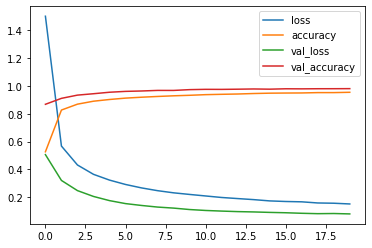

In [26]:
lossHis.plot()

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02565990388393402
Test accuracy: 0.9921000003814697


In [17]:
#real life example

def example():
    img = cv.imread('user_input.jpg',0)
    img = cv.bitwise_not(img)
    img =cv.resize(img, (28,28))
    plt.imshow(img , cmap='gray')
    plt.show()
    img = np.expand_dims(img, -1)
    img = np.expand_dims(img, 0)
    print(img.shape)
    pre =model.predict(img)
    pre = pd.DataFrame(pre)
    pre.iloc[0].plot(kind='bar')
    cv.waitKey(0)
    cv.destroyAllWindows()

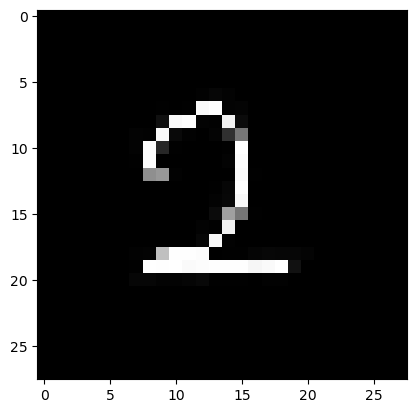

(1, 28, 28, 1)


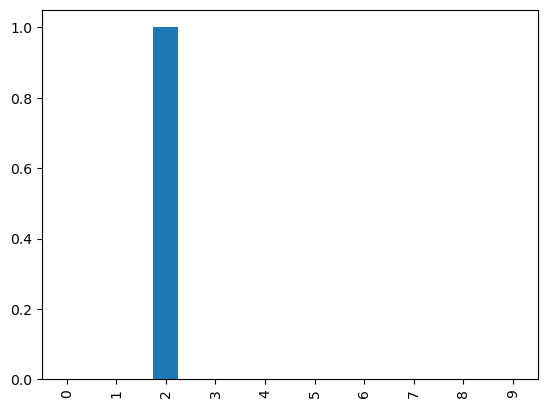

In [18]:
example()

In [19]:
# tensor board




ImportError: cannot import name 'get_config' from 'tensorflow.python.eager.context' (C:\Users\hasan\anaconda3\lib\site-packages\tensorflow\python\eager\context.py)

In [ ]:
time = time.strftime("%Y_%m_%d_%H_%M_%S")

In [ ]:
kerasboard = TensorBoard(log_dir="/tmp/tensorboard/{}".format(time),
                        batch_size=batch_size,
                        histogram_freq=1,
                        write_grads=False)


In [ ]:
print("tensorboard --logdir="+kerasboard.log_dir)